In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 23 - Dimension Reduction and Principal Components Analysis

*Principal Components Analysis* or *PCA* is a method for reducing the dimension of the data.  The dimension of the data is the number of columns or variables in the data.  We encounter dimension reduction in every day life every time we look at a 2D picture or photo of a 3D object.  Some ways of reducing the dimension are more useful than others.  For example, if someone takes a photo looking straight down at a table, it might be much harder to tell that it is a table than if the photo is taken at an angle so you can see the table top and all 4 table legs.  

Principal Components Analysis tries to map the data to lower dimensions in such a way that as much variation as possible is retained.  Specifically, PCA reduces the dimensions of the data set by successively finding the directions with the most variation and using these directions as the new coordinate system.

See [https://setosa.io/ev/principal-component-analysis/](https://setosa.io/ev/principal-component-analysis/) for a visual, interactive explaination of PCA.

### Section 1: Loading and cleaning the penguin data

We will start by looking at the Palmer penguin dataset from Labs 3, 21, and 22.  First load the data into a variable.

Data URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

In [23]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Drop the rows with missing data.

In [24]:
penguins = penguins.dropna(how="any")

For technical reasons later in the lab, we need to reset the index as well.  Recall the function is `reset_index(drop = True)`.

In [25]:
penguins = penguins.reset_index(drop=True)

<details><summary>Answer:</summary>
<code>
penguins = penguins.reset_index(drop = True)
</code>
</details>

We can use the qualitative variables `species`, `island`, and `sex` as well as the quantitative variables to do PCA by first turning them into dummy variables.

In [27]:
penguins2 = pd.concat([penguins, pd.get_dummies(penguins['species'], drop_first=False)], axis=1)
penguins2 = pd.concat([penguins2, pd.get_dummies(penguins2['island'], drop_first=False)], axis=1)
penguins2 = pd.concat([penguins2, pd.get_dummies(penguins2['sex'], drop_first=False)], axis=1)
penguins2 = penguins2.drop(["species", 'island', 'sex'], axis=1)

Because PCA looks for the direction with the highest variance, we need to pre-process our data so that each column has the same variance.  Otherwise a column with high variance will dominate.  The scaler we have used in previous labs does not make sure the variances are the same.

Instead, we will *standardize* each column of data, by taking the *z-score* of each data point.  After standardizing a column of data, the mean of that column will be 0 and the variance and standard deviation will be 1.

To do this, we create a StandardScaler object.

In [28]:
standardizer = StandardScaler()

And then use it to transform our data.  Notice the function is the same as for scaling, just applied to a StandardScaler object instead of a MinMaxScaler object.

In [29]:
penguins2_standardized = standardizer.fit_transform(penguins2)
penguins2_standardized

array([[-0.89604189,  0.7807321 , -1.42675157, ...,  2.46680084,
        -0.99103121,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, ...,  2.46680084,
         1.00904996, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, ...,  2.46680084,
         1.00904996, -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796, ..., -0.40538335,
        -0.99103121,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197, ..., -0.40538335,
         1.00904996, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757, ..., -0.40538335,
        -0.99103121,  0.99103121]])

### Section 2: Principal Components Analysis

Let's find the first two principal components for our processed penguin dataset (which we assume is stored in the variable `penguins2_standardized`):

In [30]:
# create the PCA object
pca = PCA(n_components=2)

# find the first two principal components of the penguin data
pca.fit(penguins2_standardized)

# find the coordinates of the penguin data in the new coordinate system
penguins_pca = pca.transform(penguins2_standardized)

Display `penguins_pca`.  Is it a DataFrame?

In [31]:
penguins_pca

array([[-2.30884318, -0.43493834],
       [-2.23208218, -2.1136474 ],
       [-2.29719547, -1.98824112],
       [-2.64940392, -2.05617634],
       [-2.39503891, -0.12373568],
       [-2.55629033, -2.14999981],
       [-1.59529105, -0.12102846],
       [-2.59093872, -2.06373999],
       [-2.42546772, -0.06921103],
       [-2.11774055, -0.25987785],
       [-2.5208751 , -2.28302987],
       [-2.44219003, -1.94328574],
       [-1.63365654,  0.25474209],
       [-2.94051808, -2.40697676],
       [-1.81836692,  0.56175197],
       [-1.82529917, -2.14323576],
       [-1.30292473, -0.47550876],
       [-1.43984012, -2.02673304],
       [-0.86623059, -0.45333694],
       [-0.90762707, -0.57805033],
       [-1.47934796, -2.12142457],
       [-1.07803959, -0.27146384],
       [-1.34711409, -1.95583078],
       [-2.04807544, -2.13522428],
       [-1.02310823, -0.20846177],
       [-2.63785901, -1.06504098],
       [-2.34186911,  0.60024772],
       [-2.50310654, -0.85404162],
       [-2.1110951 ,

Let's put the data from `penguins_pca` (which is a numpy array) into a DataFrame, along with the species names.

In [32]:
# put the coordinates into a DataFrame
penguins_pca_df = pd.DataFrame(penguins_pca, columns = ["PC1","PC2"])
# add the species names as a new column
penguins_pca_df["species"] = penguins["species"]

Display this dataframe.

In [33]:
penguins_pca_df

,PC1,PC2,species
0,-2.308843,-0.434938,Adelie
1,-2.232082,-2.113647,Adelie
2,-2.297195,-1.988241,Adelie
3,-2.649404,-2.056176,Adelie
4,-2.395039,-0.123736,Adelie
...,...,...,...
328,2.789404,-1.450572,Gentoo
329,2.664547,-1.400562,Gentoo
330,3.582362,0.752990,Gentoo
331,2.586955,-1.423031,Gentoo


Use Seaborn to plot a scatter plot where x is PC1 and y is PC2, with the points colored by the species.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

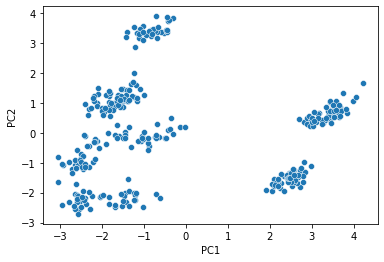

In [34]:
sns.scatterplot(data=penguins_pca_df, x="PC1", y="PC2")

What do you notice about this plot? What variation is shown along PC1?  Along PC2?

Let's compare this scatter plot with the scatter plots for all pairs of quantitative variables, colored by the species.

How do these scatterplots compare to the PCA one?  Which shows the most separation between species?  Which species is most separated from the others in the scatterplots of the original quantitiative variables?  How is this reflected in the scatterplot of the PCA coordinates?

### Section 3:  Cleaning and pre-processing the labor market data

Let's apply PCA to the labor market data from Homeworks 21 and 22.

Recall the Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market/college-labor-market_compare-majors.html).

Data URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv)

Load the data, skipping the first 13 rows and the last 3 rows.

Remove the commas in the columns `Median Wage Early Career` and `Median Wage Mid-Career`, and then change the type of the columns to `int`.

Create a new DataFrame `x` without the `Major` column, since it is qualitative.  Since each major is different, we can't easily convert this column into quantitative data using dummy variables.

Finally, create a new variable `x_standardized` with the standardized columns of `x`.  That is, with the data in each column of `x` transformed so that it has mean 0 and variance 1 (and hence also standard deviation 1).

You can use the same `standardizer` variable from Section 1.

### Section 4: Applying PCA to the labor market data

Find the first two principal components using the standardized labor data.

Create a DataFrame with the two new coordinates, as we did in Section 2.

Plot these new coordinates.  We are not coloring them yet, as it is not clear what to color them with.

What do you notice about the plot?  Do you see any distinct clusters?

Let's use k-means clustering to cluster the standardized labor data.

First use either the elbow method or the silhouette score to determine the number of clusers.

<details><summary>Answer:</summary>
(for silhouette score method)
<code>
silhouette_score_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans_clusters = kmeans.fit_predict(x_standardized)
    score = silhouette_score(x_standardized,kmeans_clusters)
    silhouette_score_list.append(score)
plt.plot(range(2,11), silhouette_score_list)
</code>
</details>

Using the k you just determined, cluster the standardized labor data. k-means to cluster the scaled labor data.

Add the cluster labels to your DataFrame with the PCA coordinates.

Plot the colored-by-cluster data using the principal component coordinates.

How are the clusters divided relative to the new PCA coordinates?  